# Introduction  <a id='introduction'></a>

This notebook contains Python code for a multivariate linear regression task. Multivariate linear regression means linear regression with more than one variable. In addition to Python, we will also use Pandas, Numpy, and Matplotlib libraries. 

This notebook is greatly inspired by the famous Machine Learning course by [Andrew Ng](https://www.andrewng.org/). As always, all the mistakes, if any, are made by me.

Finally, thanks to [@Mohan S Acharya](https://www.kaggle.com/mohansacharya) for this dataset.


# Table of Contents
* [Introduction](#introduction)
* [Helper functios](#functions)
* [The Hypothesis](#hypothesis)
* [The Cost Function](#cost)
* [Gradient Descent](#gradient)
* [Feature Normalization](#normalization)
* [Loading Data](#getdata)
* [Model Training](#training)
* [Model Validation](#validation)
* [Conclusion](#conclusion)
* [References](#references)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


# Helper Functions   <a id='functions'></a>   

<div class="alert alert-block alert-info">
<b>Tip:</b> Tip: We will use some helper functions throughout the notebook. Collecting them in one place is a good idea, making the code more organized. First, we will define and explain those functions and then use them in our code.
</div>

# The  Hypothesis   <a id='hypothesis'></a>   

The Hypotehsis Content

In [2]:
# The hypothesis
def h(x, theta):
    """
    calculates the predicted values (or predicted targets) for a given set of input and theta vectors.
    :param x: inputs (feature values) - data frame of floats 
    :param theta: theta vector (weights) - Numpy array of floats
    :return: predicted targets - Numpy array of floats
    
    """
    return np.dot(x, theta)

# The  Cost Function   <a id='cost'></a> 

The Cost function Content

In [3]:
# The cost function

def J(X,y,theta):
    """
     Calculates the total error using squared error function.
    :param X: inputs (feature values) - data frame of floats
    :param y: outputs (actual target values) - Numpy array of floats
    :param theta: theta vector (weights) - Numpy array of floats
    :return: total error - float
    
    """
    # Calculate number of examples
    m = len(X)
    
    # Calculate the constant
    c = 1/(2 * m)
       
    # Calculate the array of errors
    temp_0 = h(X, theta) - y.reshape(-1)

    # Calculate the transpose of array of errors
    temp_1 = temp_0.transpose()

    # Calculate the dot product 
    temp_2 = np.dot(temp_1, temp_0) 

    return  c * temp_2

# Gradient Descent   <a id='gradient'></a> 

The gradient Descent content

In [4]:
# Gradient descent function
def gradient(X, y, theta, alpha):
    """
     calculates the gradient descent.
    :param X: inputs (feature values) - data frame of floats
    :param y: outputs (actual target values) - Numpy array of floats
    :param theta: theta vector (weights) - Numpy array of floats
    :param alpha: learning rate
    :return: new theta - Numpy array of floats
    
    """
    # Calculate number of examples
    m = len(X)
    
    # Calculate the constant
    c =  alpha / m
        
    # calculate the transpose of X
    temp_0 = X.transpose()
        
    # Calculate the array of errors
    temp_1 = h(X, theta) - y.reshape(-1) 
        
    # Calculate the dot product 
    temp_2 = np.dot(temp_0, temp_1)
        
    return theta - (c * temp_2)

# Feature Normalization  <a id='normalization'></a>

feature normalization content

In [5]:
# the feature normalization code
def normalize(X):

    for column in X.columns:
        X[column] = (X[column] - X[column].mean()) / X[column].std()
        
    return X

# Loading Data   <a id='getdata'></a> 

In [6]:
# Get the data. Note that there are two versions. We will use the one
# with the most rows.

train_data = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

# Set y and X

y = pd.DataFrame(data = train_data['Chance of Admit ']).to_numpy()
X = train_data.drop(['Chance of Admit ', 'Serial No.'], axis=1) # Chance of Admit is the target variable and Serial No. is the order. So we drop them.

# X = normalize(X)

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1


In [7]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1


# Model Training   <a id='training'></a> 

Model training content

In [8]:
# Initialize

# Make a list of ones
ones = [1] * len(X_train)

# Insert ones to the fist column since
# X_0 for all training examples should
# be one.
X_train.insert(0, "X_0", ones, True)

# Select zero vector for initial theta
zero_list= [0] * len(X_train.axes[1])
theta = np.asarray(zero_list)

# set learning rate 
alpha = 0.000001

# Set convergence threshold
threshold = 0.000001

# Initial cost value.
# Will also be used in the first iteration
# of the while loop. If the initial cost
# is smaller then convergence threshold then
# while loop will not be executed.
cost_diff = J(X_train, y_train, theta)
print("initial Cost: {}".format(cost_diff))

# We will count the number of iterations.
my_iter = 0

# Create a dictionary of cost values for debugging
cost_dict = {} # will be used for storing the cost value of each iteration.

# Add initial cost value to the dictionary
my_key = "I_" + str(my_iter)
cost_dict[my_key] = cost_diff

# Start gradient descent
while cost_diff >= threshold:
    
    # calculate initial cost value
    initial_cost = J(X_train, y_train, theta)
    
    # calculate and assign the new theta values
    theta = gradient(X_train, y_train, theta, alpha)
    
    # calculate the consecutive cost value
    new_cost = J(X_train, y_train, theta)
        
    # calculate the difference between the consecutive
    # cost values
    cost_diff = initial_cost - new_cost
    
    # Update the dictionary
    my_key = "I_" + str(my_iter)
    cost_dict[my_key] = new_cost
    
    my_iter += 1
    
    print()
    print("Iteration: {}".format(my_iter))
    print("Calculated cost: {}".format(new_cost))
    print("cost difference: {}".format(cost_diff))

print("\n Calculated theta: {}".format(theta))
  


initial Cost: 0.272069125

Iteration: 1
Calculated cost: 0.21600248777678965
cost difference: 0.05606663722321037

Iteration: 2
Calculated cost: 0.17180047464342052
cost difference: 0.044202013133369134

Iteration: 3
Calculated cost: 0.1369523332880695
cost difference: 0.034848141355351026

Iteration: 4
Calculated cost: 0.10947862845744326
cost difference: 0.027473704830626236

Iteration: 5
Calculated cost: 0.08781880640694123
cost difference: 0.02165982205050203

Iteration: 6
Calculated cost: 0.07074255258814093
cost difference: 0.017076253818800305

Iteration: 7
Calculated cost: 0.05727990752781233
cost difference: 0.013462645060328592

Iteration: 8
Calculated cost: 0.046666171352321505
cost difference: 0.010613736175490829

Iteration: 9
Calculated cost: 0.0382984674334435
cost difference: 0.008367703918878006

Iteration: 10
Calculated cost: 0.0317014978910666
cost difference: 0.0065969695423769015

Iteration: 11
Calculated cost: 0.026500545802586248
cost difference: 0.00520095208848

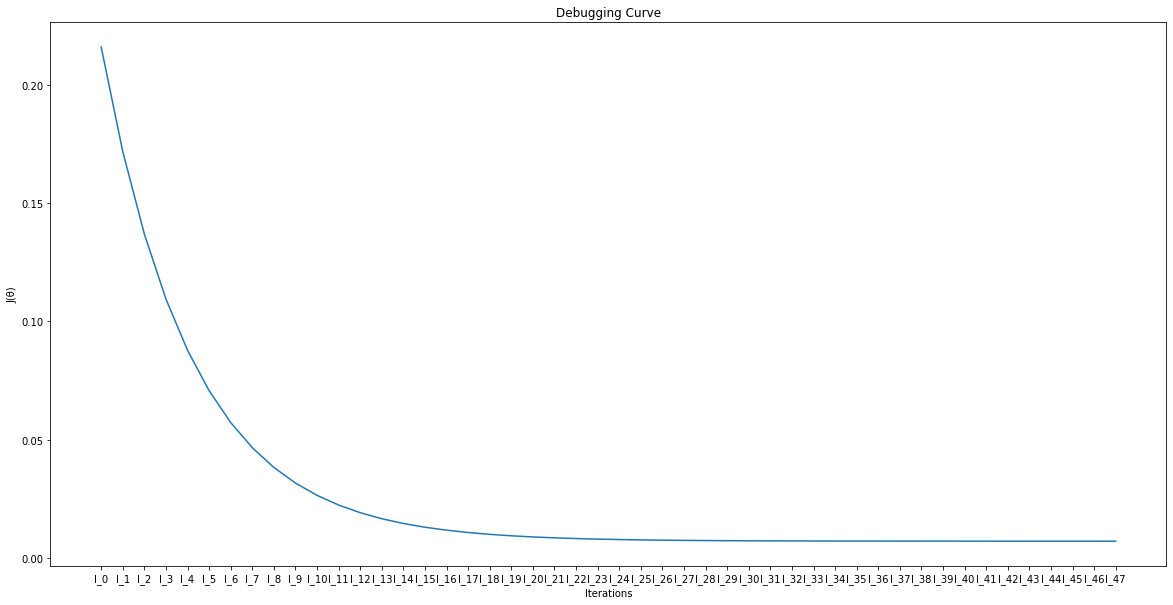

In [9]:
# Plot Debugging Curve
Y1=[x for x in cost_dict.values()]

X1=[x for x in cost_dict.keys()]

fig = plt.figure(figsize=[20, 10])
plt.xlabel('Iterations')
plt.ylabel('J(θ)')
plt.title('Debugging Curve')
plt.plot(X1,Y1, color='tab:blue')


# Model Validation   <a id='validation'></a> 

model validation content

In [10]:
# Model validation code

# Conclusion   <a id='conclusion'></a> 

Conclusion content

# References   <a id='references'></a>
* [Machine Learning Specialization - Deeplearning.AI](https://www.deeplearning.ai/program/machine-learning-specialization/)
* [Andrew Ng](https://en.wikipedia.org/wiki/Andrew_Ng)
* [@Mohan S Acharya](https://www.kaggle.com/mohansacharya)
* [10-simple-hacks-to-speed-up-your-data-analysis - Parul Pandey](https://www.kaggle.com/parulpandey/10-simple-hacks-to-speed-up-your-data-analysis)
* [Univariate Linear Regression From Scratch - Kaggle](https://www.kaggle.com/code/erkanhatipoglu/univariate-linear-regression-from-scratch)
* [Univariate Linear Regression From Scratch - Towards AI](https://pub.towardsai.net/univariate-linear-regression-from-scratch-68065fe8eb09)